# Weekend Movie Trip

Data from https://grouplens.org/datasets/movielens/ 

Using the MovieLens 20M Dataset data set

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [85]:
movies = pd.read_csv('../data/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [86]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
title      9742 non-null object
genres     9742 non-null object
dtypes: int64(1), object(2)
memory usage: 228.4+ KB


In [87]:
ratings = pd.read_csv('../data/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [88]:
len(ratings)

100836

In [89]:
tags = pd.read_csv("../data/tags.csv")       
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [90]:
len(tags["tag"].unique())

1589

### Merge movies and ratings

In [91]:
movieratings = pd.merge(movies, ratings, on=['movieId'])
movieratings.head(5)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


### Get average ratings of each movie

In [92]:
avg_ratings = movieratings.groupby('movieId')['rating'].mean().reset_index(name ='average rating')
avg_ratings.head(5)

,movieId,average rating
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429


Merge movies to average ratings

In [93]:
movieratings = pd.merge(movieratings, avg_ratings,on=['movieId'])
movieratings.head(5)

,movieId,title,genres,userId,rating,timestamp,average rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,3.92093
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,3.92093
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,3.92093
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,3.92093
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,3.92093


Drop the unused columns

In [94]:
movieratings.drop(["userId","timestamp","rating","genres"],axis=1,inplace=True)
movieratings.head(5)

,movieId,title,average rating
0,1,Toy Story (1995),3.92093
1,1,Toy Story (1995),3.92093
2,1,Toy Story (1995),3.92093
3,1,Toy Story (1995),3.92093
4,1,Toy Story (1995),3.92093


Remove duplicates lines

In [95]:
movieratings = movieratings.drop_duplicates()
movieratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9724 entries, 0 to 100835
Data columns (total 3 columns):
movieId           9724 non-null int64
title             9724 non-null object
average rating    9724 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 303.9+ KB


#### Best movies with high average ratings

In [123]:
movieratings.sort_values(by=['average rating'],ascending=False, inplace=True)
movieratings.head(10)

,movieId,title,average rating
85129,53355,Sun Alley (Sonnenallee) (1999),5.0
99641,149508,Spellbound (2011),5.0
98781,134004,What Love Is (2007),5.0
40977,2196,Knock Off (1998),5.0
98785,134095,My Love (2006),5.0
98786,134109,Radio Day (2008),5.0
92674,86237,Connections (1978),5.0
76841,8738,"Woman Is a Woman, A (femme est une femme, Une)...",5.0
99555,147410,A Perfect Day (2015),5.0
82221,44851,Go for Zucker! (Alles auf Zucker!) (2004),5.0


### Deal with genres

In [97]:
genres = movies['genres'].str.split('|').apply(pd.Series, 1).stack()

In [98]:
genres.head()

0  0    Adventure
   1    Animation
   2     Children
   3       Comedy
   4      Fantasy
dtype: object

In [99]:
genres.name = 'genres'
genres.index = genres.index.droplevel(-1)

In [100]:
movies.drop(["genres"],axis=1,inplace = True)
moviegenres = movies.join(genres)

In [101]:
moviegenres = movies.join(genres)

In [102]:
moviegenres.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy


#### Number of movies in each genre

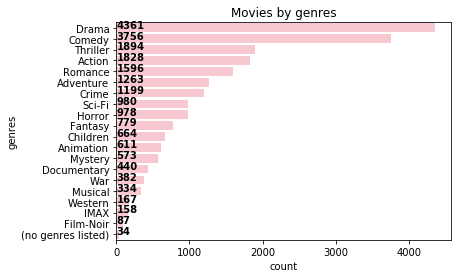

In [103]:
plt.figure()
ax = sns.countplot(y = moviegenres["genres"],color = "pink",
                   order=moviegenres["genres"].value_counts().index
                 )
for i,j in enumerate(moviegenres["genres"].value_counts().values):
    ax.text(.7,i,j,weight = "bold")
plt.title("Movies by genres")
plt.show()

Not surprisingly, Drama ranks the first and Comedy ranks the second.

### Deal with tags

In [104]:
tags.drop(["userId","timestamp"],axis=1,inplace=True)
tags.head(3)

,movieId,tag
0,60756,funny
1,60756,Highly quotable
2,60756,will ferrell


### Combine ratings and genres

In [105]:
moviegenres.drop(["title"],axis=1,inplace = True)

In [106]:
moviegenres.head()

,movieId,genres
0,1,Adventure
0,1,Animation
0,1,Children
0,1,Comedy
0,1,Fantasy


In [107]:
moviegenratings = pd.merge(moviegenres, movieratings, on=['movieId'])

In [108]:
moviegenratings.head()

,movieId,genres,title,average rating
0,1,Adventure,Toy Story (1995),3.92093
1,1,Animation,Toy Story (1995),3.92093
2,1,Children,Toy Story (1995),3.92093
3,1,Comedy,Toy Story (1995),3.92093
4,1,Fantasy,Toy Story (1995),3.92093


In [118]:
moviegenratings_ave=moviegenratings.groupby("genres")["average rating"].mean()

In [127]:
moviegenratings_ave = moviegenratings_ave.sort_values(ascending=False)

Text(0,0.5,'Average Ratings')

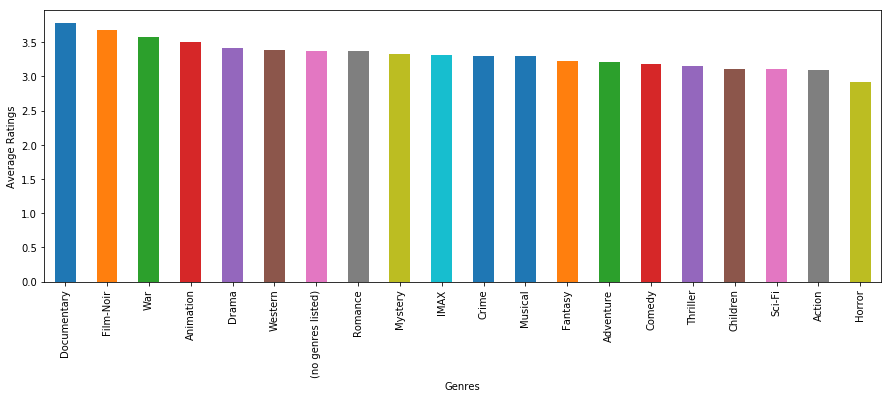

In [128]:
moviegenratings_ave.plot.bar(figsize=(15, 5))

plt.xlabel("Genres")
plt.ylabel("Average Ratings")

#### Genres with Fewer and Better movies
From the plot we can see that, Documentary movies get the highest ratings and the Film-Noir is the second. While these two categories are ranking low in the number count of the movies. 
The horror movies rank the lowest.